In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data_147_intervals.csv")
df['duration']/=512

In [6]:
intervals = df[['pr_interval', 'pj_interval', 'duration']]
intervals *= 1000
intervals = intervals.rolling(512).mean()
interval_fits = intervals.rolling(5120).median()

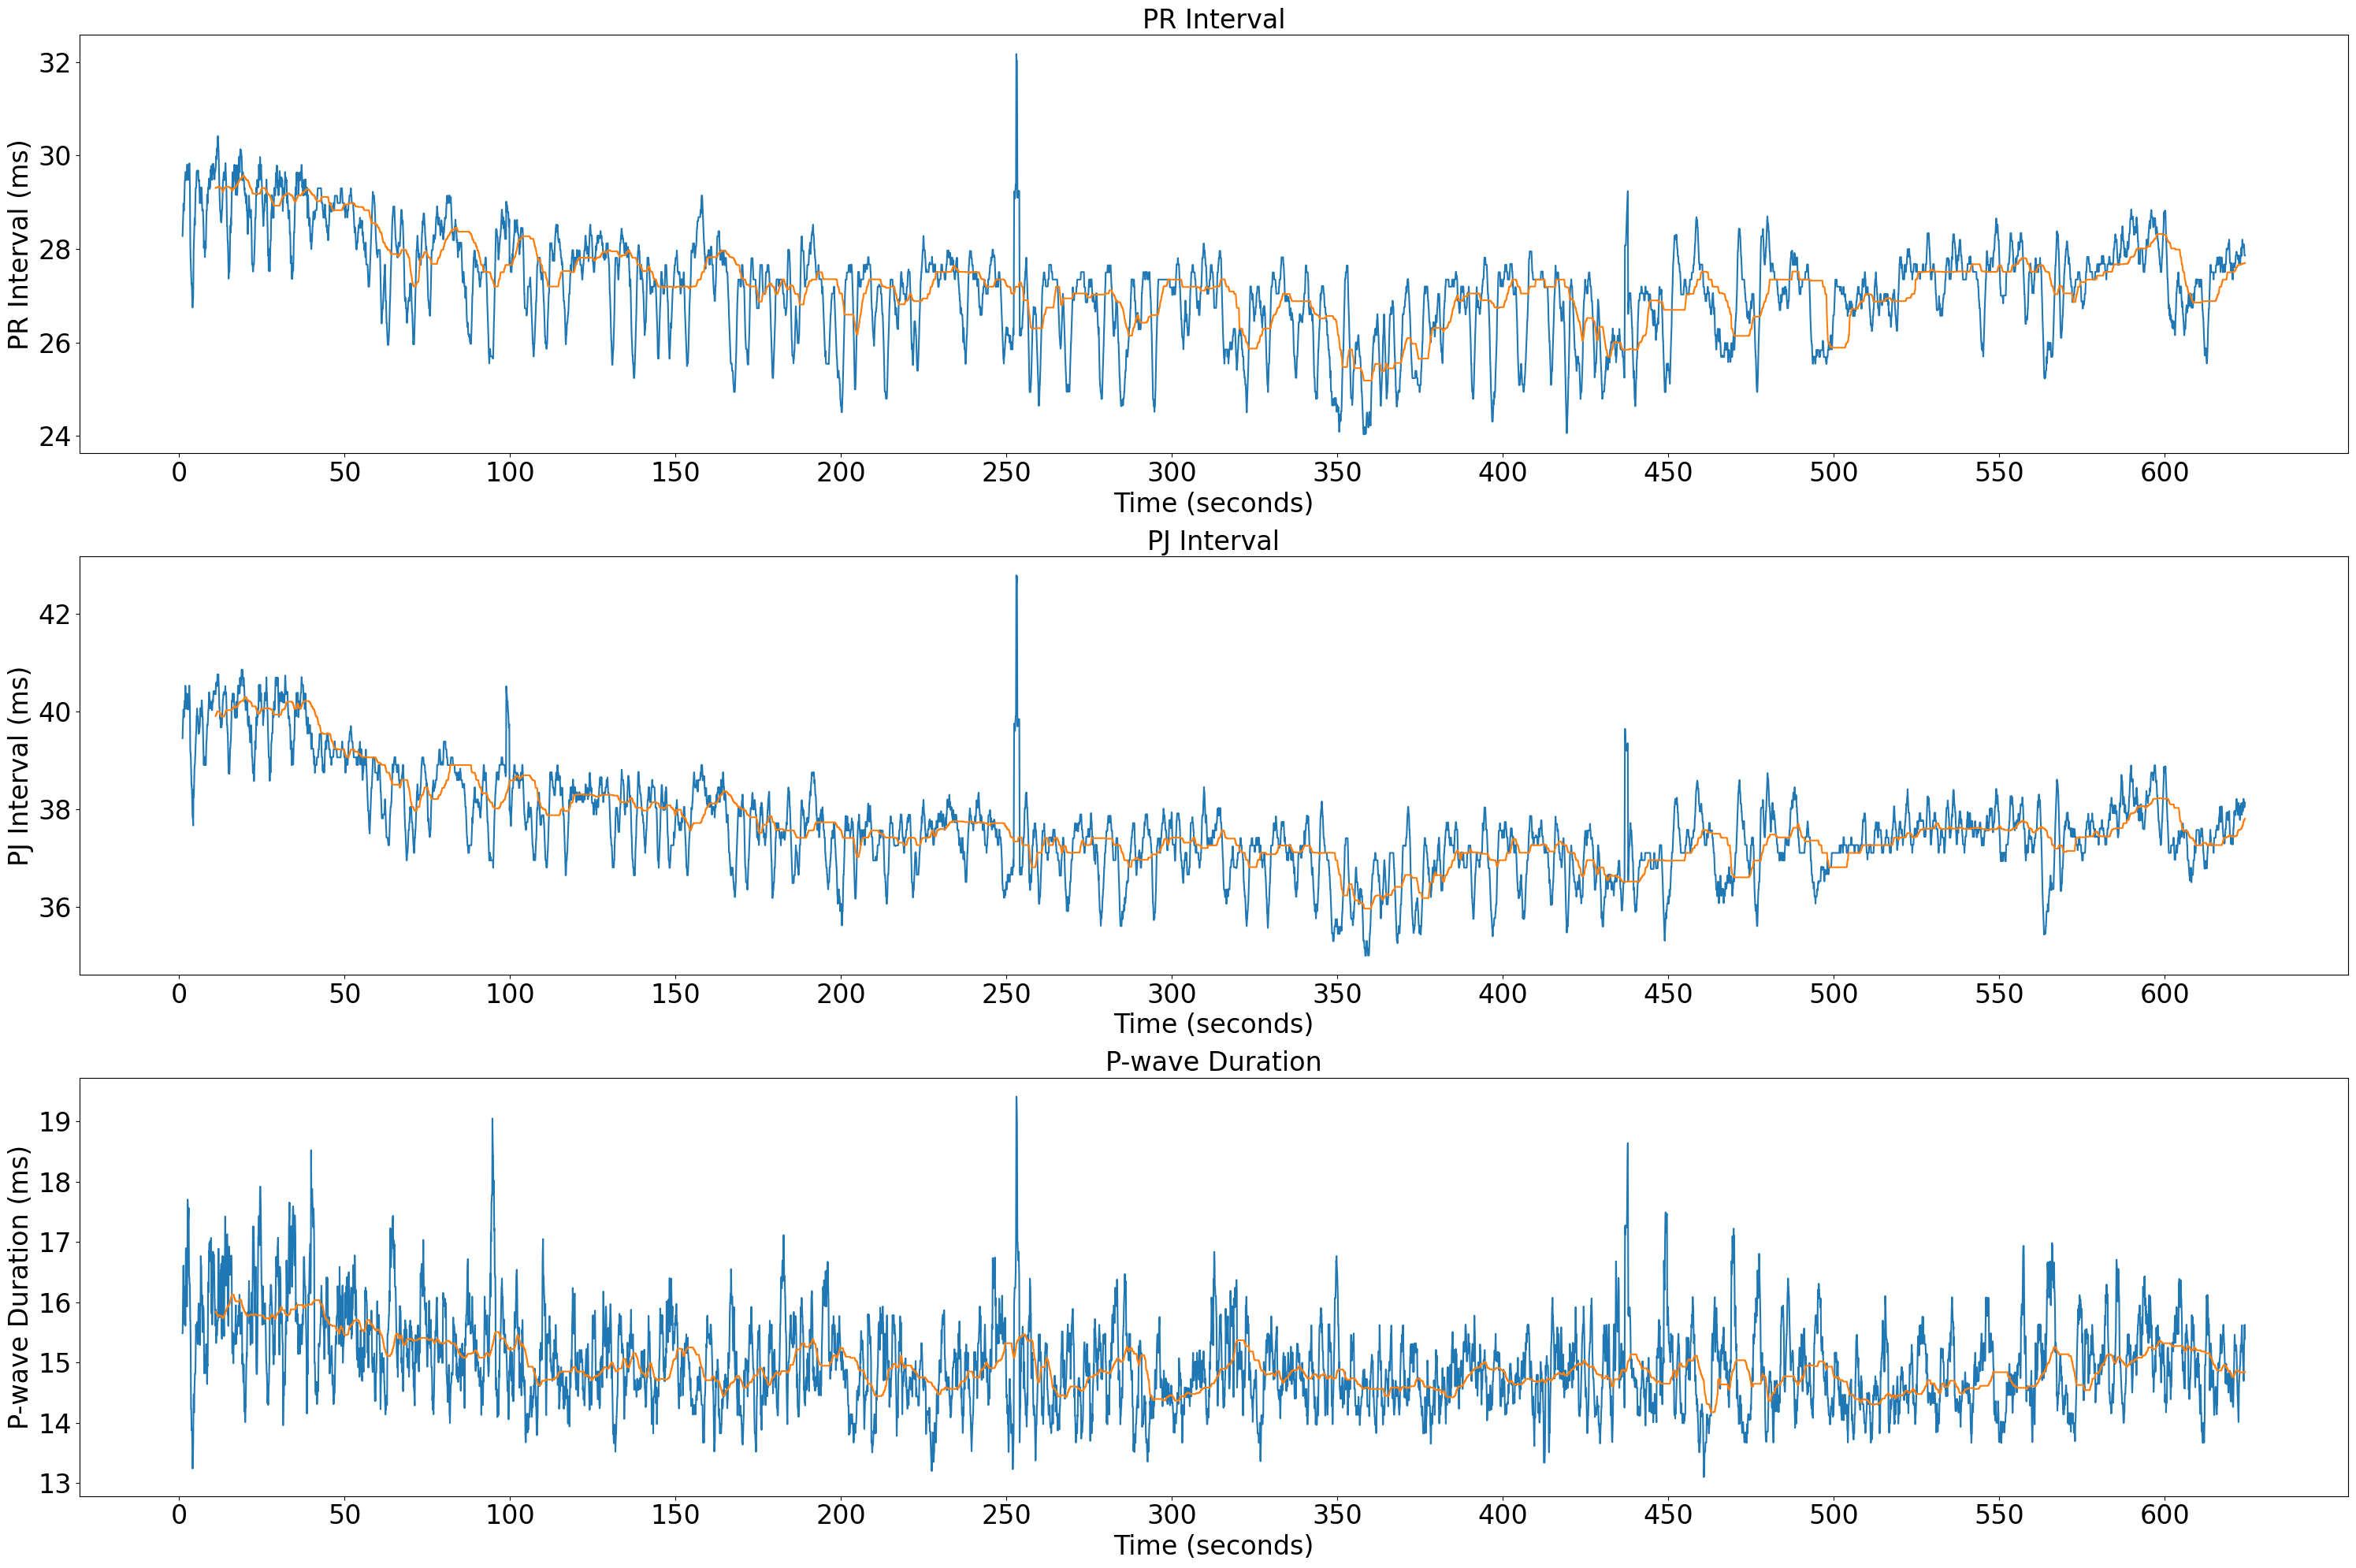

In [8]:
# Number of samples (assuming data points count matches number of samples here)
num_samples = len(intervals['pr_interval'])
time_seconds = np.arange(num_samples) / 512  # time in seconds

fontsize = 24
# Create subplots
fig, axs = plt.subplots(3, figsize=(30, 20))

# Define a function to set up each subplot
def setup_plot(ax, datas, title, ylabel):
    for d in datas:
        ax.plot(time_seconds, d, label=title)
    
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('Time (seconds)', fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    # ax.legend(fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # Setting x-ticks to integer seconds
    max_time = num_samples / 512
    ax.set_xticks(np.arange(0, max_time, step=50))  # one tick per second

# Configure each subplot
setup_plot(axs[0], [intervals['pr_interval'], interval_fits['pr_interval']], 'PR Interval', 'PR Interval (ms)')
setup_plot(axs[1], [intervals['pj_interval'], interval_fits['pj_interval']], 'PJ Interval', 'PJ Interval (ms)')
setup_plot(axs[2], [intervals['duration'], interval_fits['duration']], 'P-wave Duration', 'P-wave Duration (ms)')

# Show the plots
plt.tight_layout()
plt.show()